<a href="https://colab.research.google.com/github/avlntav/projects/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd

In [87]:

df = pd.read_excel("/content/Sample_Longlist_Data.xlsx")

In [4]:

df

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,2020-11-15,Garden,Seller 1835,Seller 1835-link,Seller 1835-storefrontlink,"1-16 of over 2,000 results",83% positive in the last 12 months (46 ratings),ZZM Store is committed to providing each custo...,"Business Name:Shenzhen Xinyile Trading Co., Ltd",Longhuaxinqu Longhuajiedao YousongDiergongyequ...,5,0,9,15,95,76,ZZMUK,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1835,2020-11-15,Garden,Seller 1836,Seller 1836-link,Seller 1836-storefrontlink,"1-16 of over 5,000 results",NaN,ZZMIARY is committed to providing each custome...,Business Name:wujixianzhanpingzongheshangdian,hebeishengshijiazhuangshiwujixiangaotouxiangxi...,0,0,0,0,1,0,Not Applicable,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1836,2020-11-15,Garden,Seller 1837,Seller 1837-link,Seller 1837-storefrontlink,"1-16 of over 10,000 results",0% positive lifetime (1 total ratings),zzshd75 is committed to providing each custome...,Business Name:henanliyanshangmaoyouxiangongsi,lankaoxianzhangjunmuzhenzhengzhuangcunerzukaif...,10,0,0,0,1,1,zwbaobei,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1837,2020-11-15,Garden,Seller 1838,Seller 1838-link,Seller 1838-storefrontlink,1-16 of 473 results,67% positive lifetime (3 total ratings),ZZY xiaodian is committed to providing each cu...,Business Name:shanximinsanyizhuangshijiancaiyo...,bei san huan da ming gong jian cai shi changba...,4,0,0,33,9,1,ZZYXiao,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [5]:
df.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL'],
      dtype='object')

In [88]:
df2 = df[['sellerlink','sellerproductcount','sellerratings',
       'Count of seller brands', "sellerdetails","businessaddress",
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings','Hero Product 2 #ratings']]

In [89]:
def extract_data(text):
    if pd.notna(text):
        start_index = text.find('(') + 1
        end_index = text.find(')')
        if start_index != -1 and end_index != -1:
            data = text[start_index:end_index]
            return data.strip()
    else:
      return None

df2['Total_ratings'] = df2['sellerratings'].apply(extract_data)

<ipython-input-89-9ef28623e098>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_ratings'] = df2['sellerratings'].apply(extract_data)


Above function separates the ratings from % positive ratings.

In [90]:
def replace_text(column):
    if pd.notna(column):
        k = str(column)
        k = k.replace('1-16 of over ', '')
        k = k.replace("results", '')
        k = k.replace('1-16 of ', '')
        k = k.strip()
        k = k.replace(',', '')
        return int(k)
    else:
        return None

df2['product_count'] = df2['sellerproductcount'].apply(replace_text)


<ipython-input-90-5332ec872d04>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['product_count'] = df2['sellerproductcount'].apply(replace_text)


Above function Separates the search apearences in to results

In [91]:
def extract_percentage(text):
    if pd.notna(text):
        percentage = text.split()[0]
        percentage = percentage.replace('%','')
        return int(percentage.strip())
    return None

df2['%positive'] = df2['sellerratings'].apply(extract_percentage)

<ipython-input-91-b113d6a43898>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['%positive'] = df2['sellerratings'].apply(extract_percentage)


Above function filters the % of positive ratings from the  seller ratings


In [95]:
import re

def extract_email(text):
  if pd.notna(text):

    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

    emails = re.findall(email_pattern, text)

    return emails
  else:
    return None

In [96]:
import re

def extract_contacts(text):
  if pd.notna(text):

    phone_pattern = r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b|\d{10}|\d{9}|\d{8}'
    phone_numbers = re.findall(phone_pattern, text)


    return phone_numbers

  else :
    return None

The above two functions will segrigate email and mobile numbers to two separate column and returns null value if there are no email and mobile number present.

In [97]:
df2["mobile"] = df2["sellerdetails"].apply(extract_contacts)

<ipython-input-97-e7932709ac59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["mobile"] = df2["sellerdetails"].apply(extract_contacts)


In [98]:
df2["email"] = df2["sellerdetails"].apply(extract_email)

<ipython-input-98-bb9b3ee3a385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["email"] = df2["sellerdetails"].apply(extract_email)


In [99]:
def identify_seller_location(business_address):
    if pd.notna(business_address):
        # Regular expression patterns for US, Germany (DE), and China (CN)
        us_pattern = r'\bUSA?\b|\bUnited States\b|\bUnited States of America\b|US|USA'
        germany_pattern = r'\bDE\b|\bGermany\b|DE|GERMANY|Germany'
        china_pattern = r'\bCN\b|\bChina\b|CHINA|China|CN'

        # Search for patterns in the business address
        if re.search(us_pattern, business_address, re.IGNORECASE):
            return 'US'
        elif re.search(germany_pattern, business_address, re.IGNORECASE):
            return 'DE'
        elif re.search(china_pattern, business_address, re.IGNORECASE):
            return 'CN'
        else:
            return 'Other'  # Seller location not identified as US, Germany, or China
    else:
        return None  # Return None if business address is empty

Above functions finds wether the seller is from US, China or Germany

In [100]:
df2["address"] = df['businessaddress'].apply(identify_seller_location)

<ipython-input-100-0873ca5965f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["address"] = df['businessaddress'].apply(identify_seller_location)


In [101]:
df2['address'].value_counts()

address
CN       847
US       465
DE       372
Other     80
Name: count, dtype: int64

In [102]:
df3 = df2[df2['address']!='CN']

Creating a new dataframe removing China sellers from the list.

below code separates the sellers based on the sellar rating column, sellers who have last 12 months ratings are considered high frequency sellars and Old sellars , and sellers with total ratings are considered low frequency sellars or new sellars.

In [107]:
High_freq_seller = df3[~df3["Total_ratings"].str.contains('total', case=False, na=False)]


In [150]:
Low_freq_seller = df3[df3["Total_ratings"].str.contains('total', case=False, na=False)]

For the High frequency sellers % positive rating is calculated over the 12 month period, so removing Max % negativity columns.

In [105]:
High_freq_seller.columns

Index(['sellerlink', 'sellerproductcount', 'sellerratings',
       'Count of seller brands', 'sellerdetails', 'businessaddress',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings', 'Total_ratings',
       'product_count', '%positive', 'mobile', 'email', 'address'],
      dtype='object')

In [115]:
High_freq_seller = High_freq_seller.drop(columns = ['sellerproductcount','Max % of negative seller ratings - last 30 days','Max % of negative seller ratings - last 90 days','Max % of negative seller ratings - last 12 months', 'sellerratings'])

Null values in the rating are removed.


In [137]:
High_freq_seller['Total_ratings'] = High_freq_seller['Total_ratings'].str.replace('ratings', '').str.strip().astype(int)


In [138]:
High_freq_seller = High_freq_seller.dropna(subset=['%positive'])


Filtering sellers who have more than 80% of positive rating.

In [139]:
High_freq_seller = High_freq_seller[High_freq_seller['%positive']>= 80]

In [140]:
High_freq_seller.describe()

,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Total_ratings,product_count,%positive
count,476.000000,476.000000,476.000000,476.000000,393.000000,476.000000
mean,9.834034,4081.611345,2293.105042,521.987395,6049.783715,93.285714
std,6.554691,10385.819760,6724.293622,1958.568882,16388.476077,5.298886
min,0.000000,0.000000,0.000000,10.000000,4.000000,80.000000
25%,2.000000,39.000000,16.000000,34.000000,276.000000,90.000000
50%,14.000000,499.000000,261.000000,120.000000,1000.000000,95.000000
75%,15.000000,3225.500000,1770.750000,345.500000,3000.000000,97.000000
max,16.000000,86856.000000,70732.000000,37124.000000,100000.000000,100.000000


In [141]:
top_high_fre_seller =  High_freq_seller[High_freq_seller['%positive']>=97]

Below is the list of top 25% sellers with positive rating between 97% to 100%

In [142]:
top_high_fre_seller.describe()

,Count of seller brands,Hero Product 1 #ratings,Hero Product 2 #ratings,Total_ratings,product_count,%positive
count,162.000000,162.000000,162.000000,162.000000,137.000000,162.000000
mean,10.135802,3085.753086,1904.475309,391.092593,2581.072993,98.407407
std,6.442778,7591.189724,5245.529472,616.832500,9458.652250,1.203285
min,0.000000,0.000000,0.000000,10.000000,4.000000,97.000000
25%,3.000000,49.500000,27.000000,35.000000,181.000000,97.000000
50%,14.000000,460.500000,255.000000,140.500000,779.000000,98.000000
75%,15.000000,3269.000000,1824.500000,437.500000,2000.000000,100.000000
max,16.000000,71670.000000,51755.000000,3416.000000,100000.000000,100.000000


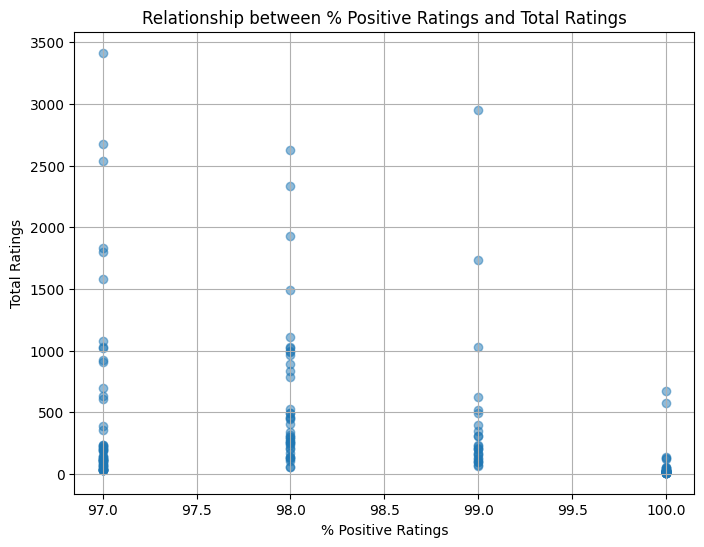

In [144]:
import matplotlib.pyplot as plt


x = top_high_fre_seller['%positive']
y = top_high_fre_seller['Total_ratings']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Relationship between % Positive Ratings and Total Ratings')
plt.xlabel('% Positive Ratings')
plt.ylabel('Total Ratings')
plt.grid(True)
plt.show()


Above scatter plot is between Total Ratings(more than 12 months) and % positive Ratings(12 month Period) Top right is the sweet spot for Razor Group to acquire new customers --- Or imagine a diagonal line passing from top left to bottom right of the graph and, any values that fall on the top-right side of the diagonal line might be consider as good sellers to be acquired.

In [143]:
top_high_fre_seller

,sellerlink,Count of seller brands,sellerdetails,businessaddress,Hero Product 1 #ratings,Hero Product 2 #ratings,Total_ratings,product_count,%positive,mobile,email,address
14,Seller 15,15,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Kaiserstr.12Borgholzhausen33829DE,1446,921,116,919.0,97.0,"[0151400085, 215752000]",[webmaster@9pm-store.de],US
22,Seller 23,16,Bestof Floral is committed to providing each c...,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,10538,8293,10,40000.0,100.0,[],[],US
24,Seller 25,15,Herzlich willkommen auf unserer Internetpräsen...,Miranderstr.21Korntal-Münchingen70825DE,3286,3079,610,3000.0,97.0,[],[],DE
25,Seller 26,15,Gesetzliche Anbieterkennung: boni-shop.com OHG...,Wissmannstrasse58Delmenhorst27755DE,2128,1759,1488,2000.0,98.0,[283905130],[amazon@boni-shop.com],DE
30,Seller 31,6,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Auf der Insel 20Pulheim50259DE,764,599,1739,1000.0,99.0,"[0223425096, 316235833]",[info@deinegartenwelt.de],DE
...,...,...,...,...,...,...,...,...,...,...,...,...
1778,Seller 1779,4,zoo-papp-de is committed to providing each cus...,Fischdiek61Itzehoe25524DE,27,13,27,33.0,100.0,[],[],DE
1780,Seller 1781,14,Matthias Löchelt\n Ruhrstraße 13\n 59955 Winte...,Am Hagen 26Winterberg59955DE,601,321,631,1000.0,97.0,[813214373],[amazon@zoostore.de],DE
1784,Seller 1785,16,Impressum nach TMG:\n\nZoreno Versandhandel Gm...,Blegistrasse 25BaarZG6340CH,25802,4979,2630,100000.0,98.0,[],[ade.support@zoreno.com],Other
1808,Seller 1809,8,Zündholz Riesa is committed to providing each ...,Paul-Greifzu-Straße22Riesa01591DE,65,41,16,52.0,100.0,[],[],DE


Similar to above further filtering the low frequency sellers

In [151]:
Low_freq_seller.columns

Index(['sellerlink', 'sellerproductcount', 'sellerratings',
       'Count of seller brands', 'sellerdetails', 'businessaddress',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings', 'Total_ratings',
       'product_count', '%positive', 'mobile', 'email', 'address'],
      dtype='object')

In [152]:
Low_freq_seller = Low_freq_seller.drop(columns =['sellerproductcount','sellerratings'])

In [163]:
Low_freq_seller = Low_freq_seller[Low_freq_seller['%positive']>= 90]

In [154]:
Low_freq_seller['Total_ratings'] = Low_freq_seller['Total_ratings'].str.replace('total ratings', '').str.strip().astype(int)


As in the %Positive column we are dealing with overall ratings but not 12, we are also removing any negitive ratings higher than 20%  from last 30 days, last 90days and last 12 months period


In [160]:
Low_freq_seller = Low_freq_seller[Low_freq_seller['Max % of negative seller ratings - last 30 days']<= 20 ]
Low_freq_seller = Low_freq_seller[Low_freq_seller['Max % of negative seller ratings - last 90 days']<= 20 ]
Low_freq_seller = Low_freq_seller[Low_freq_seller['Max % of negative seller ratings - last 12 months']<= 20 ]

In [164]:
Low_freq_seller.describe()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Total_ratings,product_count,%positive
count,139.000000,139.0,139.0,139.000000,139.000000,139.000000,139.000000,126.000000,139.000000
mean,6.661871,0.0,0.0,0.179856,1598.769784,747.244604,30.676259,6605.785714,99.079137
std,5.997045,0.0,0.0,1.504832,7676.401799,3670.303138,174.799273,12719.072831,2.502360
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,9.000000,90.000000
25%,2.000000,0.0,0.0,0.000000,1.000000,0.000000,1.000000,451.250000,100.000000
50%,4.000000,0.0,0.0,0.000000,2.000000,1.000000,2.000000,2000.000000,100.000000
75%,14.500000,0.0,0.0,0.000000,78.000000,23.500000,7.000000,8750.000000,100.000000
max,16.000000,0.0,0.0,14.000000,66776.000000,35167.000000,1699.000000,100000.000000,100.000000


There are descripencies in the data for low_freq_sellers total rating is 1 but the total %positive rating is 80%

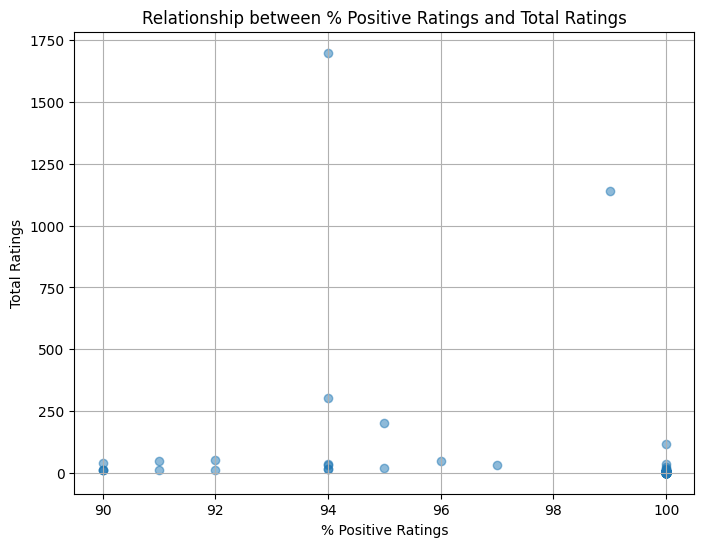

In [165]:


x = Low_freq_seller['%positive']
y = Low_freq_seller['Total_ratings']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Relationship between % Positive Ratings and Total Ratings')
plt.xlabel('% Positive Ratings')
plt.ylabel('Total Ratings')
plt.grid(True)
plt.show()

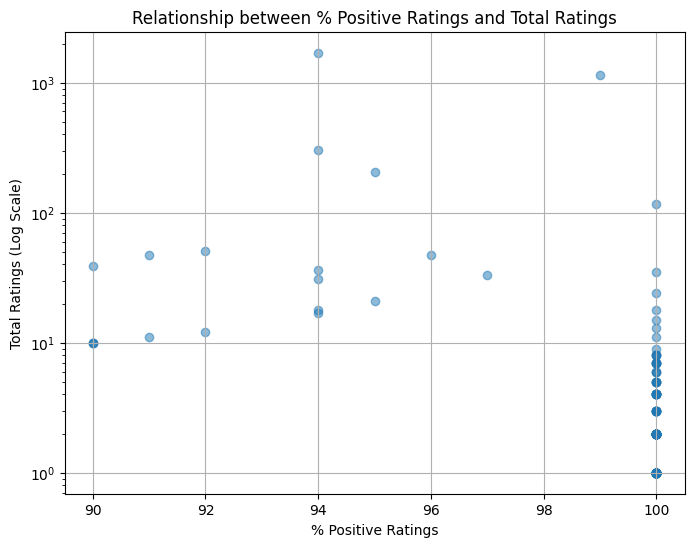

In [166]:
x = Low_freq_seller['%positive']
y = Low_freq_seller['Total_ratings']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Relationship between % Positive Ratings and Total Ratings')
plt.xlabel('% Positive Ratings')
plt.ylabel('Total Ratings (Log Scale)')
plt.grid(True)

plt.yscale('log')

plt.show()

In the above graph log access is used for better visualization, altough theere are high positive ratings (100%) there are few total ratings while selecting sellers from the low frequency table, business should take in to consideration into product types sold, products sold and choose the sellers to acquire

In [167]:
Low_freq_seller

,sellerlink,Count of seller brands,sellerdetails,businessaddress,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Total_ratings,product_count,%positive,mobile,email,address
8,Seller 9,1,7WallArts is committed to providing each custo...,No.267 Northern Industrial Zone Jinli VillageH...,0,0,0,65,9,4,133.0,100.0,[],[],US
34,Seller 35,2,HOCK Design e.K.\n\nKölner Strasse 45\n\n51766...,Kölner Strasse45Engelskirchen51766DE,0,0,0,213,212,10,42.0,90.0,[],[amazon@hockdesign.de],DE
57,Seller 58,14,kamindiscount is committed to providing each c...,NaN,0,0,0,242,101,1,21.0,100.0,[],[],None
63,Seller 64,4,kangtao is committed to providing each custome...,henanshengzhoukoushishangshuixianronghuichenge...,0,0,0,3,1,7,10000.0,100.0,[],[],US
65,Seller 66,15,"The business address is: K A Parts Limited, E...",7 Crawley Wood CloseCamberleySurreyGU15 2BXGB,0,0,0,8176,5499,1138,579.0,99.0,[],[],Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,Seller 1784,1,ZoraAlie0215 is committed to providing each cu...,songjiangqushihudangzhenxinsonggonglu12hao27zh...,0,0,0,0,0,2,30000.0,100.0,[],[],US
1785,Seller 1786,15,Zorgthuiswinkel is committed to providing each...,industriestraat 1RijenNoord brabant5121LENL,0,0,0,2043,1134,3,285.0,100.0,[],[],US
1812,Seller 1813,3,ZuoShini is committed to providing each custom...,NANHAIQUDALIZHENYANBUHEXIDADAO105HAOSHOUCENG10...,0,0,0,3,1,8,502.0,100.0,[],[],US
1815,Seller 1816,16,Zwoofershop is committed to providing each cus...,Orteliusstraat 287-3AmsterdamNoord-Holland1056...,0,0,0,27269,11333,4,2000.0,100.0,[],[],US


In [168]:

High_freq_seller.to_csv('high_frequency_sellers.csv', index=False)

Low_freq_seller.to_csv('low_frequency_sellers.csv', index=False)
